<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

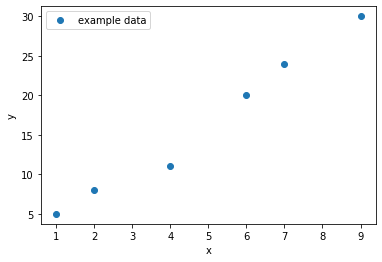

In [ ]:
import matplotlib.pyplot as plt
ex_xs = [[2], [4], [7], [1], [9], [6]]  #독립변수 6개
ex_ys = [8, 11, 24, 5, 30, 20]  #종속변수 6개

plt.plot(ex_xs[:], ex_ys, 'o', label="example data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

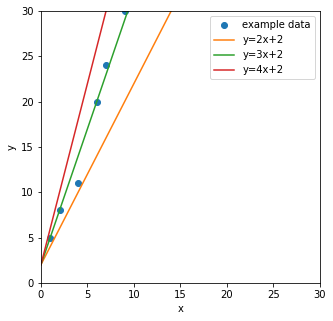

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(ex_xs[:], ex_ys, 'o', label="example data")
plt.plot([0, 30], [0*2+2, 30*2+2], label="y=2x+2")
plt.plot([0, 30], [0*3+2, 30*3+2], label="y=3x+2")
plt.plot([0, 30], [0*4+2, 30*4+2], label="y=4x+2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

In [ ]:
import numpy as np

In [ ]:
def mse(yp, y):  #yp:예측값, y:실제값
    """
    (예측값-실제값)의 제곱의 평균을 구하는 손실함수 
    """
    return np.mean(sum(yp-y)**2)

In [ ]:
b = 2  #편향은 2라고 가정
mses = []
wpl = np.arange(-10, 10, 0.5)  #가중치를 -10~10까지 0.5씩 증가하면서 확인
for wp in wpl:
    yp = wp * np.array(ex_xs) + b  #예측값
    mses.append(mse(yp, ex_ys))  #mse를 구하여 mses에 보관

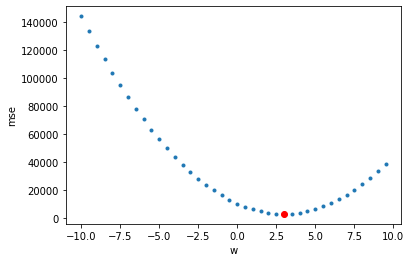

In [ ]:
mi = np.array(mses).argmin()  #최솟값이 있는 인덱스
plt.plot(wpl, mses, '.')
plt.plot(wpl[mi], mses[mi], 'or')  #최솟값
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

In [ ]:
w=3 #가중치는 3이라고 가정
mses2=[]
bpl = np.arange(-10,10,0.5) #편향을 -10~10R까지 0.5씩 증가하면서 확인하기
for bp in bpl:
  yp = w*np.array(ex_xs)+bp #예측값
  mses2.append(mse(yp,ex_ys)) #mse를 구하여 mses에 보관

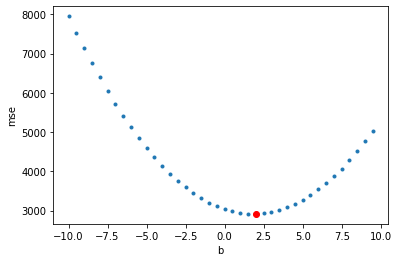

In [ ]:
mi2 = np.array(mses2).argmin()  #최솟값이 있는 인덱스
plt.plot(bpl,mses2,'.')
plt.plot(bpl[mi2],mses2[mi2],'or') #최솟값
plt.xlabel('b')
plt.ylabel('mse')
plt.show()

dmse/dw = 2mean(y-(wx+b))x

dmse/db = 2mean(y-(wx+b))

In [ ]:
def gradient(y, x, w, b):
    yp = w * x + b
    error = y - yp
    wd = -(2*sum(error*x)/len(x))
    bd = -(2*sum(error)/len(x))
    return wd.bd

In [ ]:
def gradient_descent(x,y,lr=0.0001,epochs=1000):
  """
  경사하강법 함수
  입력 매개변수:x,y,lr,epochs
    x:독립변수
    y:종속변수
    lr:경사를 이동시킬 때 사용할 비율(lr*경사만큼 이동)
    epochs: 학습 횟수
  """
  if isinstance(x,list):#x가 list일 때
    x = np.array(x).reshape(-1) #1차원 numpy 배열로 변화
  wbhl =[] #학습 과정을 기록할 컬렉션

  wp = np.random.uniform(-1,1) #가중치 초기값을 -1~1사이의 랜덤 값으로 지정
  bp = np.random.uniform(-1,1) #편향 초기값을 -1~1 사이의 랜덤 값으로 지정
  amse = 0 #경사를 조절한 후에 mse를 기억할 변수를 0으로 초기화
  for epoch in range(epochs): #epochs 횟수만큼 학습시킨다.
    bmse = amse #이전 mse로 설정
    wd,bd = gradient(y,x,wp,bp) #경사를 구함(여기에서는 경사에 -부호를 취한 값)
    yp = wp*x + bp #예측
    amse = mse(yp,y) #새로 계산한 mse값
    wp = wp - (wd*lr) #가중치를 조절
    bp = bp - (bd*lr) #편향을 조절
    wbhl.append([wp,bp])#히스토리에 가중치와 편향을 보관
    if np.abs(bmse-amse)<0.001:   #이전 mse와 이후 mse의 차이가 정해준 값보다 작다면
      break #더 이상 학습하지 말고 반복문 탈출하라
  return wp,bp,wbhl #가중치, 편향, 히스토리 반환


In [ ]:
wp,bp,wbhl = gradient_descent(ex_xs,ex_ys)
for epoch, (ewp, ebp) in enumerate(wbhl):
  print(f'epoch:{epoch} w:{ewp} b:{ebp}')

AttributeError: ignored

In [ ]:
xs = np.array(ex_xs)
xs = xs[:, 0]
ys = np.array(ex_ys)

In [ ]:
min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))
for epoch, wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]
  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs,ys,'.',label='actural data')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

NameError: ignored

In [ ]:
min_index = -1  #최솟값이 있는 인덱스를 -1로 초기화
min_mse = np.inf  #mse최솟값을 무한대로 초기화
for epoch, (wp, bp) in enumerate(wbhl):
    yp = wp * xs + bp
    mse_val = mse(yp, ys)
    if min_mse > mse_val:  #새로운 값이 더 작다면
        min_mse = mse_val  #작은 값으로
        min_index = epoch
    plt.plot(wp, mse_val, '.')
plt.plot(wbhl[min_index][0], mse_val, 'rp')
plt.show()

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()  #모델 생성
lr_model.fit(ex_xs, ex_ys)  #학습
print(f'w:{lr_model.coef_} b:{lr_model.intercept_}')

w:[3.1886121] b:0.9217081850533795


In [ ]:
pv = lr_model.predict([[12], [30], [50]])  #예측해 주세요
print(pv)

[ 39.18505338  96.58007117 160.35231317]


In [ ]:
from sklearn import datasets

In [ ]:
iris_data = datasets.load_iris()
iris_data

In [ ]:
xs = np.array([[x] for x in iris_data.data[:, 0]])
print(xs.shape)
ys = np.array([y for y in iris_data.data[:, 1]])
print(ys.shape)

(150, 1)
(150,)


In [ ]:
wp,bp,wbhl = gradient_descent(xs, ys)
for epoch, (ewp, ebp) in enumerate(wbhl):
  print(f'epoch:{epoch} w:{ewp} b:{ebp}')

AttributeError: ignored

In [ ]:
xs2 = np.array(xs)
xs2 = xs2[:,0]
ys2 = np.array(ys)
print(xs2.shape, ys2.shape)

(150,) (150,)


In [ ]:
min_val = min(min(xs2),min(ys2))
max_val = max(max(xs2),max(ys2))
for epoch, wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]
  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs2,ys2,'.',label='actural')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

NameError: ignored